# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.


In [25]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso

In [26]:
df = pd.read_csv("../data/hw2data.csv", index_col = 0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,y
0,,,,,,,,,,,,,,,,,,,,,
0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,-1.000330,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,-0.855240,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,0.371173,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,-0.082344,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [27]:
y = df['y']
X = df.ix[:, 0:-1]

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

We obtain a maximal Lasso Regression Score of 0.8492 when alpha is 0.00031.


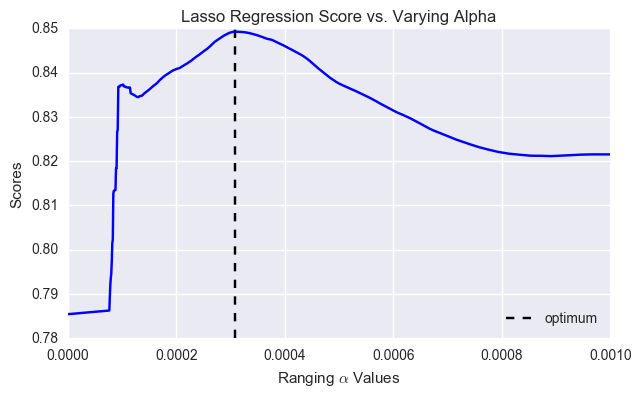

In [57]:
# split training data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size=.8, random_state=10)
alphas = np.logspace(-8, -3, 1000)

scores = []
maxScore = 0.0
maxAlpha = 0.0
for alpha in alphas:
    
    regr = Lasso(alpha=alpha)
    
    regr.fit(xTrain, yTrain)
    score = regr.score(xTest,yTest)
    scores.append(score)
    
    if (score > maxScore):
        maxScore = score
        maxAlpha = alpha

scores = np.array(scores)
print(r"We obtain a maximal Lasso Regression Score of %.4f when alpha is %.5f." % (maxScore, maxAlpha))

fig = plt.figure(figsize=(7, 4))
axes = fig.add_subplot(111)
axes.set_xlabel(r"Ranging $\alpha$ Values")
axes.set_ylabel("Scores")
axes.set_title("Lasso Regression Score vs. Varying Alpha")
axes.plot(maxAlpha * np.ones(len(alphas)), np.linspace(0.78, .85, len(alphas)), 'k--', label='optimum')
axes.plot(alphas, scores, '-b', markersize=6)
axes.legend(loc=4)
plt.show()

d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.

The optimal penalizer for Lasso regression is 0.00031


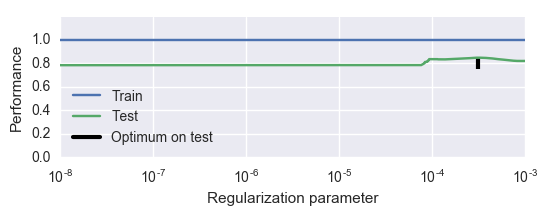

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in
alphas = []
alphas = np.logspace(-8, -3, 1000)
train_errors=[]
test_errors=[]
alpha_optim=0.0

maxScore= 0.0
for alpha in alphas:
    
    regr = Lasso(alpha=alpha)
    
    regr.fit(xTrain, yTrain)
    train_errors.append(regr.score(xTrain, yTrain))
    
    testScore = regr.score(xTest, yTest)
    test_errors.append(testScore)
    
    if (testScore > maxScore):
        maxScore = testScore
        alpha_optim = alpha
        
print("The optimal penalizer for Lasso regression is %.5f" % alpha_optim)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

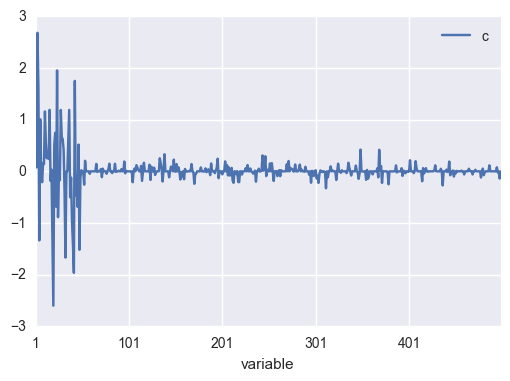

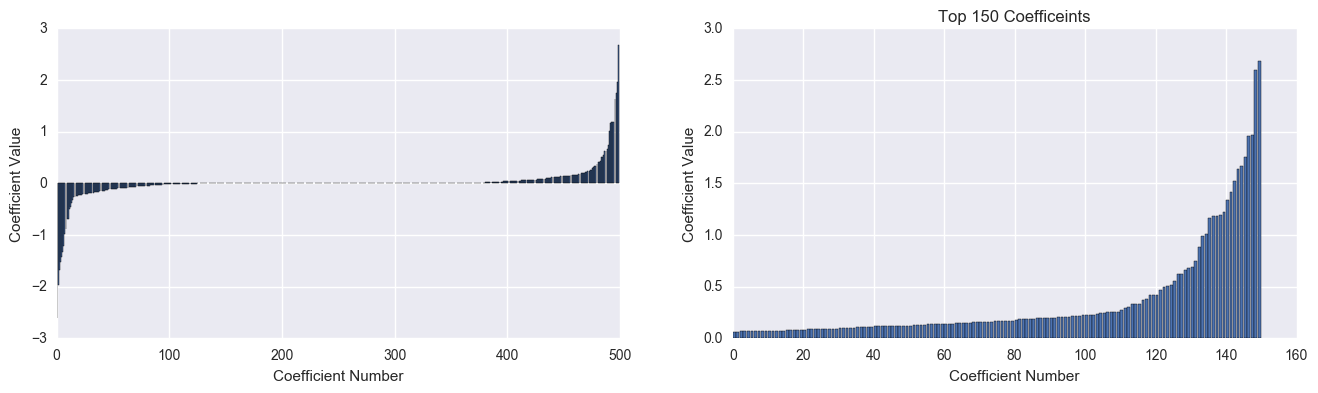

In [93]:
regr = Lasso(alpha=alpha_optim)
regr.fit(xTrain, yTrain)
testScore = regr.score(xTest, yTest)
coeffs = pd.DataFrame({'c':regr.coef_, 'variable':X.columns.values})

# Coefficients are ordered 0 to 499 in this plot
coeffs.plot(x = 'variable', y='c')

# Below plot is sorted based on coefficient value
fig = plt.figure(figsize=(16, 4))
axes = fig.add_subplot(1,2,1)
axes.bar( range(499), np.sort( coeffs['c'] ) )
axes.set_xlabel("Coefficient Number")
axes.set_ylabel("Coefficient Value")

axes = fig.add_subplot(1,2,2)

N = 150
topN = np.sort( np.abs(coeffs['c']) )[-N:]
axes.bar(range(N), topN)
axes.set_xlabel("Coefficient Number")
axes.set_ylabel("Coefficient Value")
axes.set_title("Top %d Coefficeints" % N)
plt.show()

The reason why there are so many coefficients that have a value of zero is because of the geometry that underlies lasso regression.  Lasso regression penalizes coefficients with an L1 norm and the shape of this constraint on the typical least squares problem is essentially a "hyper-polygone/square" of sorts.  We saw the in two dimensions this is a square whose points are on the x and y axes and each of these points are connected linearly to another point on another axes.  This shape/geometry extends to D dimensions and naturally we tend to get constrained optimal points on the axis because of the lack of smoothness.  This explains why we get so many zero'ed out coefficients. 

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

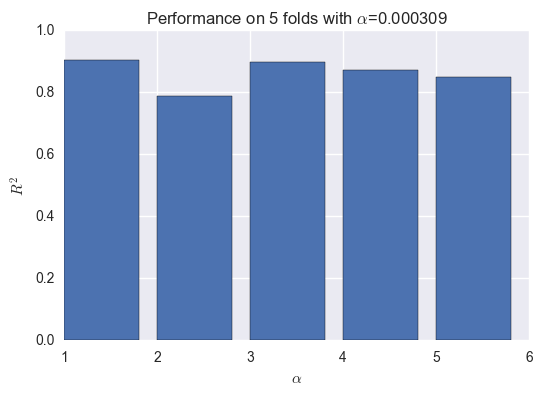

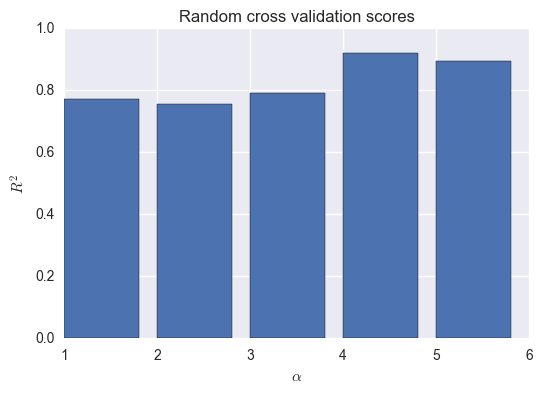

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X, y, cv=5)

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.title(r'Performance on 5 folds with $\alpha$=%f' % (alpha_optim))
plt.bar(range(1,6),scores)
plt.show()

# analyze the effect random subsets have on R^2
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, train_size=0.8)
scorecv = cross_val_score(regr, X, y, cv=cv)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$')
plt.bar(range(1, 6), scorecv)
plt.title('Random cross validation scores')
plt.show()

We clearly see that Lasso Regularization works well on random subsets as the above plot indicates that we are consistently attaining R^2 values between .7 and .9.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [95]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing

def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

In [96]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


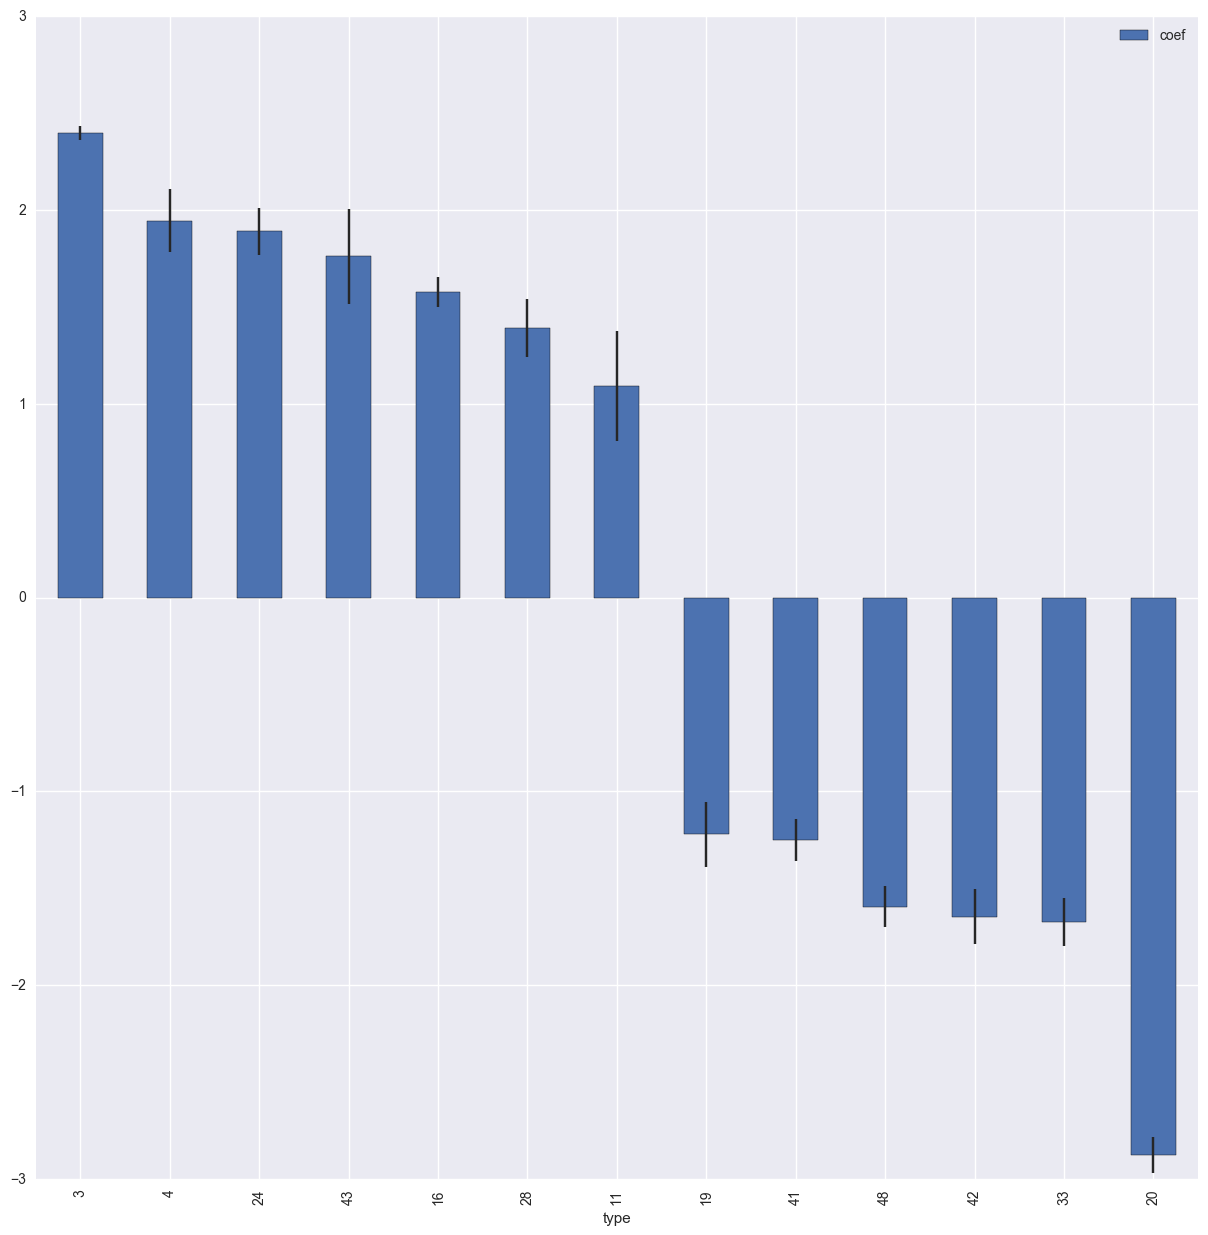

In [98]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))
plt.show()